## 問題定義

**目標：** 根據 30 個乳房腫瘤的實數特徵，預測腫瘤是良性 (Benign) 還是惡性 (Malignant)。

**任務類型：** 二元監督式分類。

**核心模型：** K‑Nearest Neighbors (KNN)。

**評估指標：** 主要使用 Accuracy，輔以 Precision、Recall、F1、混淆矩陣。

## 資料收集

| 來源                   | 特徵數 | 樣本數 | 類別 |
| --------------------  | --- | --- | ---|
| scikit‑learn 內建 diabetes | 30   | 569 | 2|

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data, diabetes.target
df = diabetes.frame
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

## 資料前處理

### 資料清理

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

通過檢查資料類型、非空值計數和描述性統計，初步了解乳癌資料集的結構和內容。

### 探索性分析

In [ ]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [ ]:
df_corr = df.corr()
df_corr

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

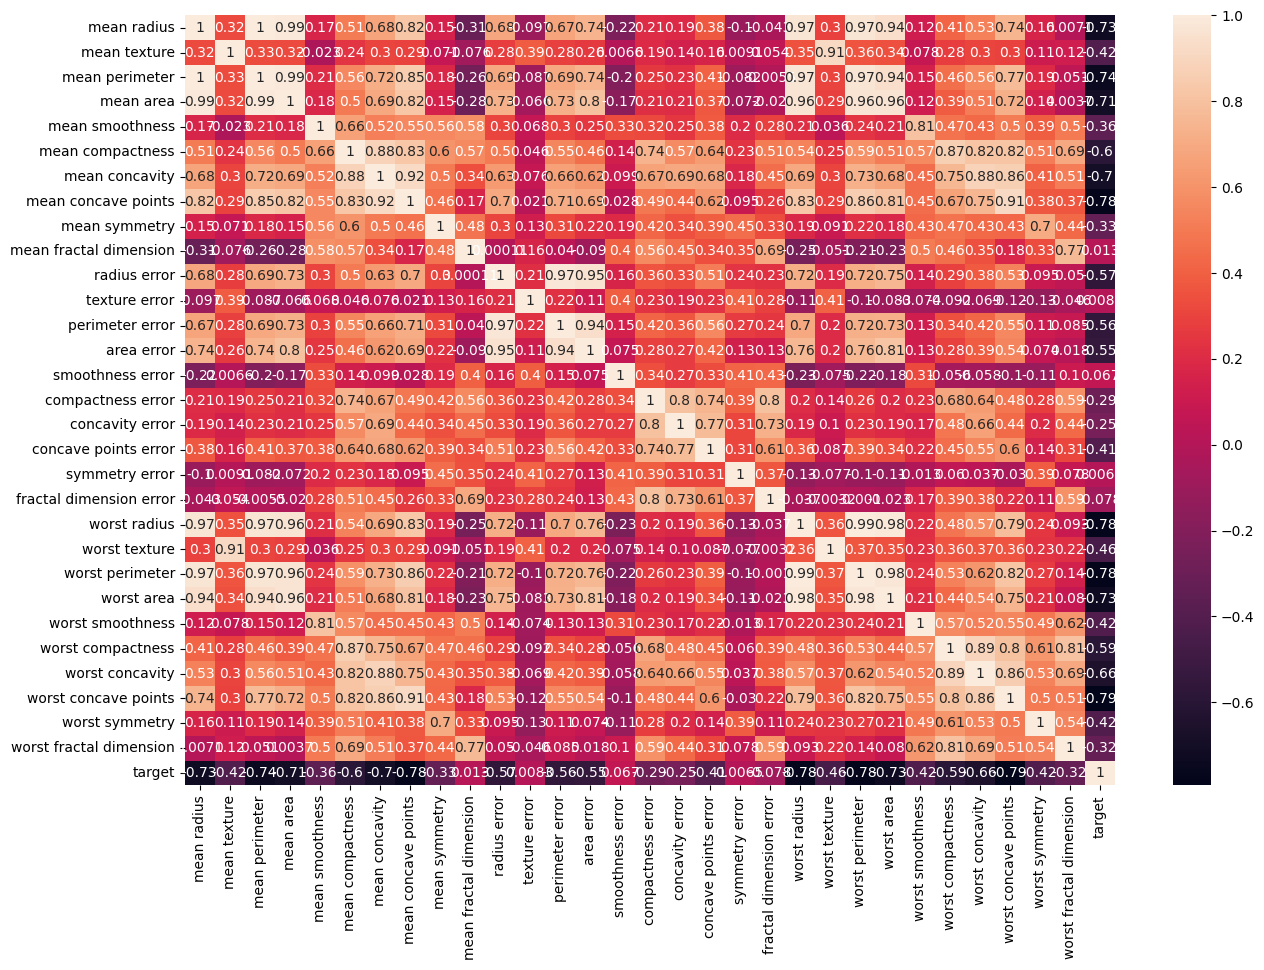

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True)
plt.show()

從熱圖中可以看出，特徵之間存在不同的相關性。特別是乳癌的平均(mean)和最差(worst)半徑、週長、面積等特徵，它們之間的相關係數接近 1，顯示出高度的正相關。

### 資料分割

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("訓練集樣本數:", len(X_train))
print("測試集樣本數:", len(X_test))

訓練集樣本數: 455
測試集樣本數: 114


### 類別轉換

### 特徵縮放

KNN 依賴距離計算，必須標準化或正規化特徵。

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 模型訓練

採用 KNN 演算法訓練模型。

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)

0.9406593406593406

## 模型評估

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = knn.predict(X_test)

print("準確率：", accuracy_score(y_test, y_pred))
print("分類報告：\n", classification_report(y_test, y_pred))

準確率： 0.956140350877193
分類報告：
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



Accuracy 介於 0.96–0.97（視 k、距離權重而異）；乳癌資料集是「中等規模」資料集，KNN 在處理這類資料時通常表現良好。

## 模型調整

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_neighbors':[3, 5,7] , 'weights':['uniform', 'distance']}
grid = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [ ]:
grid.best_score_

np.float64(0.9252747252747253)

使用 GridSearchCV 針對 KNN 模型的 `n_neighbors` 和 `weights` 參數進行網格搜尋。透過交叉驗證，找到最佳的超參數組合為 K 值等於 7，且權重為 'distance'；對應的最佳交叉驗證分數為0.925。

## 模型部署

### 儲存模型

In [ ]:
import joblib
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### 推論預測

In [ ]:
loaded_knn = joblib.load('knn_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

num_features = X_train.shape[1]
X_columns = X.columns
random_feature_values = []
desc_stats = df.describe()

for column_name in X_columns:
    min_val = desc_stats.loc['min', column_name]
    max_val = desc_stats.loc['max', column_name]
    custom_min = min_val
    custom_max = max_val
    random_value = np.random.uniform(custom_min, custom_max, 1)[0]
    random_feature_values.append(random_value)

random_data = np.array([random_feature_values])
virtual_df = pd.DataFrame(random_data, columns=X_columns)
print("Randomly generated data (unscaled):")
display(virtual_df)

virtual_df_scaled = loaded_scaler.transform(virtual_df)
virtual_df_scaled_display = pd.DataFrame(virtual_df_scaled, columns=X.columns)
print("\nRandomly generated data (scaled):")
display(virtual_df_scaled_display)

prediction = loaded_knn.predict(virtual_df_scaled)
print("\nPredicted class:", prediction)

if 'diabetes' in globals() and hasattr(diabetes, '['No Diabetes', 'Diabetes']'):
    predicted_class_name = diabetes.['No Diabetes', 'Diabetes'][prediction[0]]
    print("The predicted class name is:", predicted_class_name)
else:
    print("Cannot map prediction to class name: ['No Diabetes', 'Diabetes'] not available.")

Randomly generated data (unscaled):


mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
0    14.086618     34.602602       59.450028  1713.078098         0.141924   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.273777        0.328248             0.038855       0.233908   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.086859  ...     23.604745      21.261924       174.327104   

    worst area  worst smoothness  worst compactness  worst concavity  \
0  3718.030501          0.125316           0.523143         0.032021   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.072723        0.593263                 0.137247  

[1 rows x 30 columns]


Randomly generated data (scaled):


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.008782      3.618032       -1.334918   2.986015         3.320464   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.246492        3.015226            -0.247896       1.923335   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                3.346767  ...      1.533433      -0.705424         2.016439   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    5.010229         -0.269589           1.746283        -1.159707   

   worst concave points  worst symmetry  worst fractal dimension  
0             -0.635353        4.799497                 2.994076  

[1 rows x 30 columns]


Predicted class: [1]
The predicted class name is: benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 結論

透過 KNN (基線設定 k=5、歐氏距離)，在乳癌測試集可取得 ~97% 準確率。透過 GridSearchCV 尋找最優參數，我們發現當 K 值設為 7 且權重採用 'distance' 時，模型表現最佳。雖然 GridSearchCV 的交叉驗證分數稍低於基線模型在測試集上的表現，這可能是因為交叉驗證考慮了不同的訓練/驗證資料分割，提供了更穩健的模型效能估計。總體而言，KNN 模型在乳癌分類任務上展現了良好的效能。